# SUPPORT VECTOR MACHINES

In [1]:
#This is a practice from Support Vector Machines in Python from Start to Finish.
#Statquest by Josh Starmer

In [2]:
#import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [3]:
#import the data
df= pd.read_excel("default of credit card clients.xls",header=1)
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
#Rename the last column name as "Defaulter"
df = df.rename(columns = {'default payment next month':'DEFAULTER'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df = df.drop('ID', axis=1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.isna().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULTER    0
dtype: int64

In [7]:
df.info()
#all the rows have data. No missing data is there. All the data has integers.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [8]:
#Check the column values for all the columns
for col in df.columns:
    print("Column {0} has the following values: ".format(col))
    print(df[col].value_counts())

Column LIMIT_BAL has the following values: 
LIMIT_BAL
50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: count, Length: 81, dtype: int64
Column SEX has the following values: 
SEX
2    18112
1    11888
Name: count, dtype: int64
Column EDUCATION has the following values: 
EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64
Column MARRIAGE has the following values: 
MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64
Column AGE has the following values: 
AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51

In [9]:
#Assuming 0 values are missing values. Removing the 0s
df.loc[(df['EDUCATION']==0 ) | (df['MARRIAGE']==0 )]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER
218,110000,2,3,0,31,0,0,0,0,0,...,73315,63818,63208,4000,5000,3000,3000,3000,8954,0
809,160000,2,2,0,37,0,0,0,0,0,...,28574,27268,28021,35888,1325,891,1000,1098,426,0
820,200000,2,3,0,51,-1,-1,-1,-1,0,...,780,390,390,0,390,780,0,390,390,0
1019,180000,2,3,0,45,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
1443,200000,1,3,0,51,-1,-1,-1,-1,0,...,2529,1036,4430,5020,9236,2529,0,4430,6398,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28602,200000,2,3,0,37,1,-1,-1,-1,-1,...,4000,22800,5716,35000,5000,4000,22800,5716,0,0
28603,110000,2,3,0,44,2,2,2,2,2,...,41476,42090,43059,2000,2000,1700,1600,1800,1800,1
28766,80000,2,3,0,40,2,2,3,2,-1,...,1375,779,5889,5000,0,0,885,5889,4239,0
29078,100000,2,3,0,56,1,2,0,0,2,...,31134,30444,32460,0,1500,2700,0,2400,0,0


In [10]:
df_no_missing = df.loc[df[(df['EDUCATION'] !=0 ) | (df['MARRIAGE'] !=0 )].index]
df_no_missing.info()
df_no_missing.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   30000 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [11]:
#SVM works better with relatively smaller datasets. So we downsample the dataset

In [12]:
len(df_no_missing)

30000

In [13]:
df_no_missing.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
df_defaulter = df_no_missing[df_no_missing['DEFAULTER']==0]
df_no_defaulter = df_no_missing[df_no_missing['DEFAULTER']==1]

In [15]:
df_defaulter.info() #23364 rows
df_no_defaulter.info() #6636 rows

<class 'pandas.core.frame.DataFrame'>
Index: 23364 entries, 2 to 29996
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  23364 non-null  int64
 1   SEX        23364 non-null  int64
 2   EDUCATION  23364 non-null  int64
 3   MARRIAGE   23364 non-null  int64
 4   AGE        23364 non-null  int64
 5   PAY_0      23364 non-null  int64
 6   PAY_2      23364 non-null  int64
 7   PAY_3      23364 non-null  int64
 8   PAY_4      23364 non-null  int64
 9   PAY_5      23364 non-null  int64
 10  PAY_6      23364 non-null  int64
 11  BILL_AMT1  23364 non-null  int64
 12  BILL_AMT2  23364 non-null  int64
 13  BILL_AMT3  23364 non-null  int64
 14  BILL_AMT4  23364 non-null  int64
 15  BILL_AMT5  23364 non-null  int64
 16  BILL_AMT6  23364 non-null  int64
 17  PAY_AMT1   23364 non-null  int64
 18  PAY_AMT2   23364 non-null  int64
 19  PAY_AMT3   23364 non-null  int64
 20  PAY_AMT4   23364 non-null  int64
 21  PAY_AMT5   23364 

In [16]:
#https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html
df_no_defaulter_downsampled = resample( df_no_defaulter,
                                       replace=False,
                                       n_samples=3000,
                                        )
df_no_defaulter_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 18738 to 1339
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  3000 non-null   int64
 1   SEX        3000 non-null   int64
 2   EDUCATION  3000 non-null   int64
 3   MARRIAGE   3000 non-null   int64
 4   AGE        3000 non-null   int64
 5   PAY_0      3000 non-null   int64
 6   PAY_2      3000 non-null   int64
 7   PAY_3      3000 non-null   int64
 8   PAY_4      3000 non-null   int64
 9   PAY_5      3000 non-null   int64
 10  PAY_6      3000 non-null   int64
 11  BILL_AMT1  3000 non-null   int64
 12  BILL_AMT2  3000 non-null   int64
 13  BILL_AMT3  3000 non-null   int64
 14  BILL_AMT4  3000 non-null   int64
 15  BILL_AMT5  3000 non-null   int64
 16  BILL_AMT6  3000 non-null   int64
 17  PAY_AMT1   3000 non-null   int64
 18  PAY_AMT2   3000 non-null   int64
 19  PAY_AMT3   3000 non-null   int64
 20  PAY_AMT4   3000 non-null   int64
 21  PAY_AMT5   3000

In [17]:
df_defaulter_downsampled = resample( df_defaulter,
                                       replace=False,
                                       n_samples=3000,
                                        )
df_defaulter_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 9975 to 26369
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  3000 non-null   int64
 1   SEX        3000 non-null   int64
 2   EDUCATION  3000 non-null   int64
 3   MARRIAGE   3000 non-null   int64
 4   AGE        3000 non-null   int64
 5   PAY_0      3000 non-null   int64
 6   PAY_2      3000 non-null   int64
 7   PAY_3      3000 non-null   int64
 8   PAY_4      3000 non-null   int64
 9   PAY_5      3000 non-null   int64
 10  PAY_6      3000 non-null   int64
 11  BILL_AMT1  3000 non-null   int64
 12  BILL_AMT2  3000 non-null   int64
 13  BILL_AMT3  3000 non-null   int64
 14  BILL_AMT4  3000 non-null   int64
 15  BILL_AMT5  3000 non-null   int64
 16  BILL_AMT6  3000 non-null   int64
 17  PAY_AMT1   3000 non-null   int64
 18  PAY_AMT2   3000 non-null   int64
 19  PAY_AMT3   3000 non-null   int64
 20  PAY_AMT4   3000 non-null   int64
 21  PAY_AMT5   3000

In [18]:
#concat the dataframes into single dataframe
df_downsampled = pd.concat([df_defaulter_downsampled,df_no_defaulter_downsampled])
df_downsampled = df_downsampled.reset_index()
df_downsampled.head()


,index,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER
0,9975,110000,2,2,1,41,0,0,0,0,...,79496,72458,72168,4000,4000,3530,4000,4000,5000,0
1,24411,190000,1,2,2,32,0,0,0,2,...,10633,11197,11907,2000,2000,1000,1000,1000,1000,0
2,26821,110000,1,1,2,29,0,0,0,0,...,92615,92657,93364,6000,4800,4300,3600,3500,3600,0
3,11428,210000,2,2,2,29,0,0,0,0,...,93164,94167,97672,4000,4000,4000,10000,5000,3000,0
4,1623,170000,1,2,2,36,-1,-1,-1,-1,...,12654,25784,19950,2081,10725,12654,25784,19950,200,0


In [19]:
#For Splitting the data into train and test, we have to create X (with all the predictors) and y (the variable to be predicted)
X = df_downsampled.drop('DEFAULTER', axis=1)
y = df_downsampled['DEFAULTER']
X.head()


,index,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,9975,110000,2,2,1,41,0,0,0,0,...,92457,79496,72458,72168,4000,4000,3530,4000,4000,5000
1,24411,190000,1,2,2,32,0,0,0,2,...,10060,10633,11197,11907,2000,2000,1000,1000,1000,1000
2,26821,110000,1,1,2,29,0,0,0,0,...,100272,92615,92657,93364,6000,4800,4300,3600,3500,3600
3,11428,210000,2,2,2,29,0,0,0,0,...,90648,93164,94167,97672,4000,4000,4000,10000,5000,3000
4,1623,170000,1,2,2,36,-1,-1,-1,-1,...,10719,12654,25784,19950,2081,10725,12654,25784,19950,200


In [20]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: DEFAULTER, dtype: int64

In [21]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
X_encoded = pd.get_dummies(X, 
                   columns = ['SEX','EDUCATION','MARRIAGE',
                             'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])
X_encoded.head()

,index,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,9975,110000,41,100143,98338,92457,79496,72458,72168,4000,...,False,False,True,False,False,False,False,False,False,False
1,24411,190000,32,6415,8169,10060,10633,11197,11907,2000,...,False,False,True,False,False,False,False,False,False,False
2,26821,110000,29,106698,104546,100272,92615,92657,93364,6000,...,False,False,True,False,False,False,False,False,False,False
3,11428,210000,29,86598,88304,90648,93164,94167,97672,4000,...,False,False,True,False,False,False,False,False,False,False
4,1623,170000,36,2104,2074,10719,12654,25784,19950,2081,...,False,True,False,False,False,False,False,False,False,False


In [22]:
#Splitting into Train and Test
#0.25 will go into test by default if not mentioned otherwise. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train,X_test, y_train,y_test = train_test_split(X_encoded,y )

In [23]:
#We are scaling the data separately to avoid data leakage
X_train_scaled = scale(X_train)
X_test_scaled= scale(X_test)

In [24]:
#Create the model. https://scikit-learn.org/stable/modules/svm.html#classification
svm_model = SVC(kernel = 'linear')
svm_model.fit(X_train_scaled,y_train)
prediction = svm_model.predict(X_test)

C:\Users\devle\miniconda3_py11\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


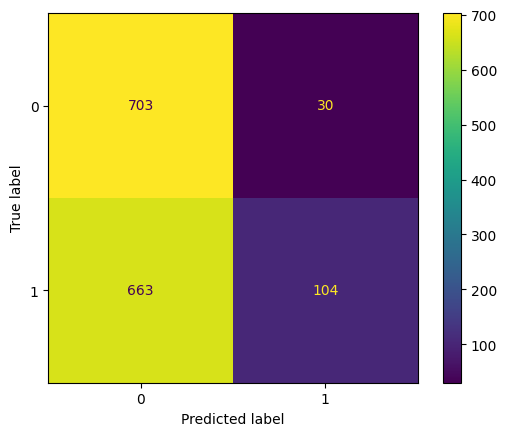

In [25]:
conf_matrix = confusion_matrix(y_test, prediction, labels=svm_model.classes_)

cm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                     display_labels=svm_model.classes_)
cm.plot()

In [26]:
#To optimize parameters, we will use grid search CV
param_grid = [
            {
                'C': [0.5, 1, 10, 50, 100],
                'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                'kernel': ['rbf'],              
            } ]

In [27]:
optional_params = GridSearchCV(
                                SVC(),
                                param_grid,
                                cv=5,
                                scoring='accuracy',
                                verbose=2
)
optional_params.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.6s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.7s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.6s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.6s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.9s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.9s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.8s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.8s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.9s
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.8s
[CV] END .......................C=0.5, gamma=0.

[CV] END ........................C=50, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END ........................C=50, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END ........................C=50, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END ........................C=50, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END .......................C=50, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END .......................C=50, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END .......................C=50, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END .......................C=50, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END .......................C=50, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END ......................C=50, gamma=0.001, kernel=rbf; total time=   0.7s
[CV] END ......................C=50, gamma=0.001, kernel=rbf; total time=   0.7s
[CV] END ......................C=50, gamma=0.001, kernel=rbf; total time=   0.8s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 50, 100],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy', verbose=2)

In [28]:
print(optional_params.best_params_)


{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


C:\Users\devle\miniconda3_py11\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


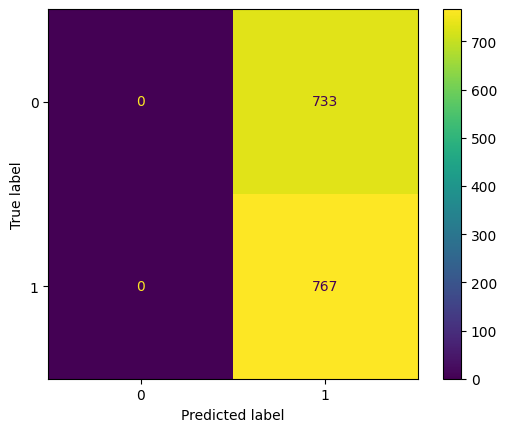

In [33]:
svm_model = SVC(C = 1, gamma= 'scale', kernel = 'rbf')
svm_model.fit(X_train_scaled,y_train)
prediction = svm_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, prediction, labels=svm_model.classes_)

cm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                     display_labels=svm_model.classes_)
cm.plot()

C:\Users\devle\miniconda3_py11\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


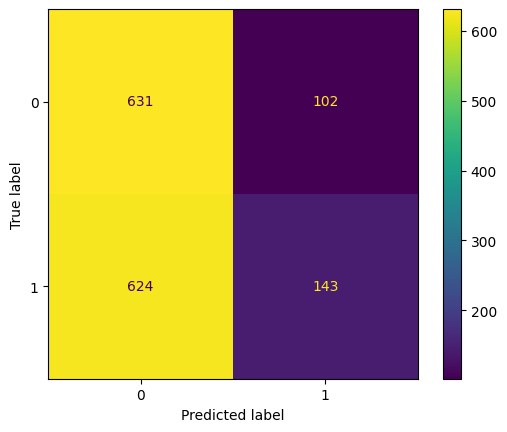

In [30]:
svm_model = SVC(kernel = 'poly')
svm_model.fit(X_train_scaled,y_train)
prediction = svm_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, prediction, labels=svm_model.classes_)

cm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                     display_labels=svm_model.classes_)
cm.plot()

C:\Users\devle\miniconda3_py11\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


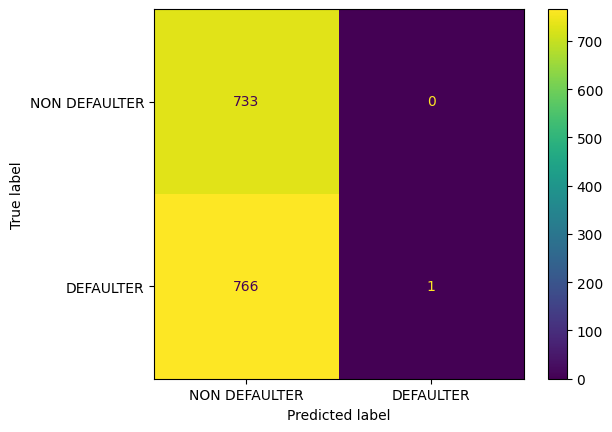

In [31]:
svm_model = SVC(kernel = 'sigmoid')
svm_model.fit(X_train_scaled,y_train)
prediction = svm_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, prediction, labels=svm_model.classes_)

cm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                     display_labels=['NON DEFAULTER', 'DEFAULTER'])
cm.plot()